<a href="https://colab.research.google.com/github/Bongbong12/MACHINE-LEARNING/blob/main/tugas9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


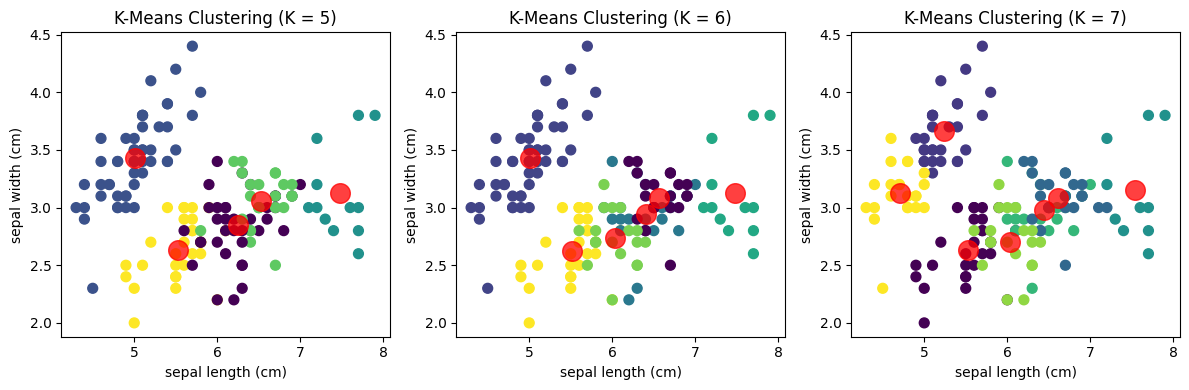

In [1]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Memuat dataset Iris
iris = load_iris()
X = iris.data

# Menjalankan algoritma K-Means dengan jumlah cluster yang ditentukan (K = 5)
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(X)
y_kmeans_5 = kmeans_5.predict(X)

# Memvisualisasikan hasil clustering untuk K = 5
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_5, s=50, cmap='viridis')
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering (K = 5)')

# Menjalankan algoritma K-Means dengan jumlah cluster yang ditentukan (K = 6)
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(X)
y_kmeans_6 = kmeans_6.predict(X)

# Memvisualisasikan hasil clustering untuk K = 6
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_6, s=50, cmap='viridis')
plt.scatter(kmeans_6.cluster_centers_[:, 0], kmeans_6.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering (K = 6)')

# Menjalankan algoritma K-Means dengan jumlah cluster yang ditentukan (K = 7)
kmeans_7 = KMeans(n_clusters=7)
kmeans_7.fit(X)
y_kmeans_7 = kmeans_7.predict(X)

# Memvisualisasikan hasil clustering untuk K = 7
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_7, s=50, cmap='viridis')
plt.scatter(kmeans_7.cluster_centers_[:, 0], kmeans_7.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering (K = 7)')

plt.tight_layout()
plt.show()

In [2]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances


In [3]:
def sum_squared_errors(X, labels, centers):
    sse = 0
    for i, center in enumerate(centers):
        sse += np.sum((X[labels == i] - center) ** 2)
    return sse

In [4]:
def dunn_index(X, labels, centers):
    distances = euclidean_distances(X)
    intra_cluster_distances = np.zeros((len(centers),))
    for i, center in enumerate(centers):
        intra_cluster_distances[i] = np.max(distances[labels == i][:, labels == i])

    min_inter_cluster_distance = np.min(distance.cdist(centers, centers))
    max_intra_cluster_distance = np.max(intra_cluster_distances)

    return min_inter_cluster_distance / max_intra_cluster_distance

In [8]:
# Evaluate K-Means with K = 5
sse_5 = sum_squared_errors(X, y_kmeans_5, kmeans_5.cluster_centers_)
silhouette_5 = silhouette_score(X, y_kmeans_5)
davies_bouldin_5 = davies_bouldin_score(X, y_kmeans_5)
calinski_harabasz_5 = calinski_harabasz_score(X, y_kmeans_5)
dunn_5 = dunn_index(X, y_kmeans_5, kmeans_5.cluster_centers_)

In [9]:
# Evaluate K-Means with K = 6
sse_6 = sum_squared_errors(X, y_kmeans_6, kmeans_6.cluster_centers_)
silhouette_6 = silhouette_score(X, y_kmeans_6)
davies_bouldin_6 = davies_bouldin_score(X, y_kmeans_6)
calinski_harabasz_6 = calinski_harabasz_score(X, y_kmeans_6)
dunn_6 = dunn_index(X, y_kmeans_6, kmeans_6.cluster_centers_)


In [7]:
# Evaluate K-Means with K = 7
sse_7 = sum_squared_errors(X, y_kmeans_7, kmeans_7.cluster_centers_)
silhouette_7 = silhouette_score(X, y_kmeans_7)
davies_bouldin_7 = davies_bouldin_score(X, y_kmeans_7)
calinski_harabasz_7 = calinski_harabasz_score(X, y_kmeans_7)
dunn_7 = dunn_index(X, y_kmeans_7, kmeans_7.cluster_centers_)

In [10]:
# Print evaluation results
print("Evaluation Results:")
print("K = 5:")
print("Silhouette Score:", silhouette_5)
print("Sum of Squared Errors (SSE):", sse_5)
print("Davies-Bouldin Index:", davies_bouldin_5)
print("Calinski-Harabasz Index:", calinski_harabasz_5)
print("Dunn Index:", dunn_5)
print("\nK = 6:")
print("Silhouette Score:", silhouette_6)
print("Sum of Squared Errors (SSE):", sse_6)
print("Davies-Bouldin Index:", davies_bouldin_6)
print("Calinski-Harabasz Index:", calinski_harabasz_6)
print("Dunn Index:", dunn_6)
print("\nK = 7:")
print("Silhouette Score:", silhouette_7)
print("Sum of Squared Errors (SSE):", sse_7)
print("Davies-Bouldin Index:", davies_bouldin_7)
print("Calinski-Harabasz Index:", calinski_harabasz_7)
print("Dunn Index:", dunn_7)

Evaluation Results:
K = 5:
Silhouette Score: 0.4930804067193521
Sum of Squared Errors (SSE): 46.472230158730156
Davies-Bouldin Index: 0.8193844948350408
Calinski-Harabasz Index: 495.24341371472747
Dunn Index: 0.0

K = 6:
Silhouette Score: 0.4792552478132227
Sum of Squared Errors (SSE): 41.71201010101011
Davies-Bouldin Index: 0.898826298902946
Calinski-Harabasz Index: 441.6513935549895
Dunn Index: 0.0

K = 7:
Silhouette Score: 0.35686181725363725
Sum of Squared Errors (SSE): 34.4201917862839
Davies-Bouldin Index: 0.9627510239060608
Calinski-Harabasz Index: 447.96335897343477
Dunn Index: 0.0
